# PIK3CA: Effects of Mutation on IRS1

In [2]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
import re
import statsmodels.stats.multitest

In [3]:
import CPTAC

Loading CPTAC data:
Loading Dictionary...
Loading Clinical Data...
Loading Proteomics Data...
Loading Transcriptomics Data...
Loading CNA Data...
Loading Phosphoproteomics Data...
Loading Somatic Mutation Data...

 ******PLEASE READ******
CPTAC is a community resource project and data are made available
rapidly after generation for community research use. The embargo
allows exploring and utilizing the data, but the data may not be in a
publication until July 1, 2019. Please see
https://proteomics.cancer.gov/data-portal/about/data-use-agreement or
enter CPTAC.embargo() to open the webpage for more details.


In [4]:
somatic_mutations = CPTAC.get_somatic()
proteomics = CPTAC.get_proteomics()
phos = CPTAC.get_phosphoproteomics()

#somatic_mutations.loc[(somatic_mutations['Gene'] == "PIK3R1")]

# PIK3R1 mutation and IRS1 proteome abundance 

#### Take out the control

In [5]:
proteomics = proteomics[:100]

### Perform t-test wiht mutated and non-mutated protein levels

In [6]:
protList = ['IRS1']
pcutoff = 0.05 / len(protList)
gene = 'PIK3CA'

sigResults = [];
for protein in protList: 
    if protein in proteomics.columns:
        cross = CPTAC.compare_mutations(proteomics, protein, gene)
        cross = cross[["Mutation", protein]].dropna(axis=0)
        mutated = cross.loc[cross["Mutation"] == "Missense_Mutation"]
        wt = cross.loc[cross["Mutation"] == "Wildtype"]
        ttest = scipy.stats.ttest_ind(mutated[protein], wt[protein])
        if(ttest[1] <= pcutoff):
            sigResults.append(protein)
            print("Test for " + protein + ": ")
            print(ttest)
         
        else:
            print("Unsignificant result for " + protein + ": ")
            print(ttest)

Unsignificant result for IRS1: 
Ttest_indResult(statistic=-1.0601355321350932, pvalue=0.29177084447657115)


## PIK3R1 mutation and IRS1 phosphoproteom abundance

In [7]:
sites = phos.columns
p_values = []
site_names = []


phosProtList = ['IRS1']

alpha = 0.05
p_value = alpha/len(phosProtList)



for protein in phosProtList:
    pattern = re.compile(protein)
    isInList = filter(pattern.search, sites)
    if next(isInList, None) is not None:
        phosphositesdf = CPTAC.compare_mutations(phos, protein, gene)
        phosphositesdf = phosphositesdf.loc[phosphositesdf['Patient_Type'] == 'Tumor'].drop('Patient_Type', axis = 1)
        for site in phosphositesdf.columns:
            if (site is not 'Mutation'):
                sitedf = CPTAC.compare_mutations(phos, site, gene)
                mutateddf = sitedf.loc[sitedf['Mutation'] != 'Wildtype'].dropna(axis=0)
                wtdf = sitedf.loc[sitedf['Mutation'] == 'Wildtype'].dropna(axis=0)
                ttest = scipy.stats.ttest_ind(mutateddf[site], wtdf[site])
                p_values.append(ttest[1])
                site_names.append(site)     
                
areSignificant = statsmodels.stats.multitest.fdrcorrection(p_values)[0]
pvalues = statsmodels.stats.multitest.fdrcorrection(p_values)[1]
significant_sites = np.array(site_names)[np.array(areSignificant)]
significant_pvalues = np.array(pvalues)[np.array(areSignificant)]

significant_vals = dict(zip(significant_sites, significant_pvalues))

print(significant_sites)
print(significant_pvalues)
print(significant_vals)

/Users/emilyhosk/anaconda3/envs/research/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3157: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/Users/emilyhosk/anaconda3/envs/research/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


['IRS1-S1005' 'IRS1-S1100' 'IRS1-S1101' 'IRS1-S1133' 'IRS1-S1134'
 'IRS1-S270' 'IRS1-S307' 'IRS1-S323' 'IRS1-S330' 'IRS1-S337' 'IRS1-S341'
 'IRS1-S374' 'IRS1-S415' 'IRS1-S527' 'IRS1-S531' 'IRS1-S629' 'IRS1-S636'
 'IRS1-S672' 'IRS1-S766' 'IRS1-T305' 'IRS1-T309' 'IRS1-T530']
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan]
{'IRS1-S1005': nan, 'IRS1-S1100': nan, 'IRS1-S1101': nan, 'IRS1-S1133': nan, 'IRS1-S1134': nan, 'IRS1-S270': nan, 'IRS1-S307': nan, 'IRS1-S323': nan, 'IRS1-S330': nan, 'IRS1-S337': nan, 'IRS1-S341': nan, 'IRS1-S374': nan, 'IRS1-S415': nan, 'IRS1-S527': nan, 'IRS1-S531': nan, 'IRS1-S629': nan, 'IRS1-S636': nan, 'IRS1-S672': nan, 'IRS1-S766': nan, 'IRS1-T305': nan, 'IRS1-T309': nan, 'IRS1-T530': nan}


/Users/emilyhosk/anaconda3/envs/research/lib/python3.7/site-packages/statsmodels/stats/multitest.py:320: RuntimeWarning: invalid value encountered in less_equal
  reject = pvals_sorted <= ecdffactor*alpha


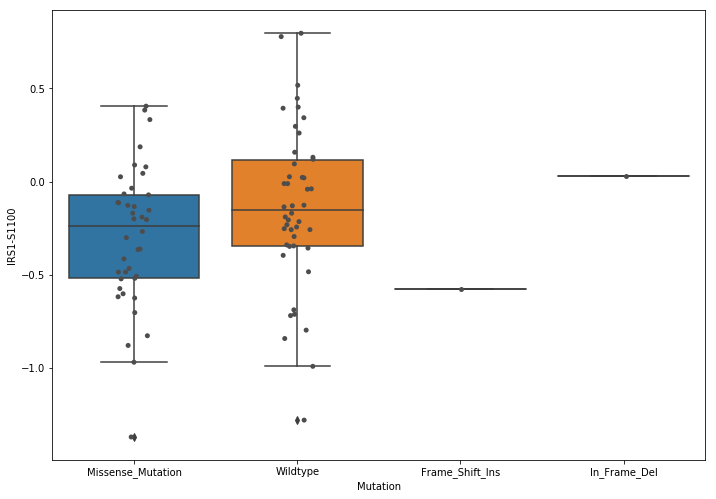

In [8]:
phosdf = CPTAC.compare_mutations(phos, protein, gene)

phosdf = phosdf.loc[phosdf['Patient_Type'] == 'Tumor']

a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

boxplt = sns.boxplot(data = phosdf, x = 'Mutation', y = 'IRS1-S1100')
boxplt = sns.stripplot(data = phosdf, x = 'Mutation', y = 'IRS1-S1100', jitter = True, color = '.3')
plt.show()